In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sys

# 단순 선형 회귀

https://jfun.tistory.com/157
https://docs.google.com/presentation/d/137IlT2N3AYcclqxNuc8j9RDrIeHiYkSZ5JPg_vg9Jqk/edit#slide=id.g1d115b0ec5_0_138

## 최소제곱법
https://medium.com/@youngji/%EC%B5%9C%EC%86%8C%EC%A0%9C%EA%B3%B1%EB%B2%95-least-squared-method-f7357990329f

74.666664
70.98
67.386665
63.88667
60.479992
57.166668
53.946674
50.819996
47.78667
44.84666
42.0
39.246666
36.586662
34.020004
31.546667
29.166666
26.88
24.686666
22.58667
20.58
18.666666
16.846666
15.12
13.486667
11.946668
10.5
9.146666
7.886667
6.72
5.646666
4.6666665
3.78
2.986667
2.2866664
1.68
1.1666666
0.7466666
0.42000008
0.18666662
0.04666671
0.0
0.04666671
0.18666674
0.41999987
0.7466665
1.1666666
1.6800003
2.2866673
2.986666
3.7799995
4.6666665
5.646666
6.720001
7.8866653
9.146668
10.5
11.946666
13.486669
15.119998
16.84667
18.666666
20.579996
22.58667
24.686666
26.880005
29.166666
31.546661
34.020004
36.586662
39.24667
42.0
44.84666
47.786663
50.820007
53.946674
57.166668
60.479992
63.886658
67.386665
70.98


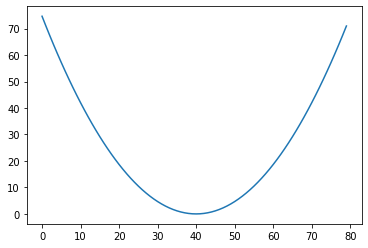

In [4]:
# 데이터 준비
x_train = [1,2,3]
y_train = [1,2,3]

#가설 준비 : WX +b
W = tf.placeholder(tf.float32)
hypot = W*x_train

#비용함수

cost=tf.reduce_mean(tf.square(hypot - y_train))

#----------------- 텐서플로우의 그래프 작성 완료

sess = tf.Session()
cost_val = []
for i in range(-30,50):
    cost_result = sess.run(cost, feed_dict = {W:i*0.1})
    print(cost_result)
    cost_val.append(cost_result)
    
plt.plot(cost_val)

sess.close()

### 경사하강 알고리즘을 이용한 가중치 학습

In [11]:
# 데이터 준비
x_train = [1,2,3]
y_train = [1,2,3]

#가설 준비 : WX +b
W = tf.Variable(tf.random_normal([1]), dtype = tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype = tf.float32)
hypot = W*x_train +b

#비용함수

cost = tf.reduce_mean(tf.square(hypot - y_train))
# 최저 비용 학습을 위한 경사하강알고리즘
alpha = 0.1
gradient = tf.reduce_mean((W*x_train - y_train)*x_train)
descent = W - alpha * gradient
update = W.assign(descent) # W = descent
#----------------- 텐서플로우의 그래프 작성 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    _, c, w = sess.run([update, cost, W])
    print(step, c, w)
    


sess.close()

0 24.800497 [-0.275586]
1 6.601957 [0.31968743]
2 1.650272 [0.6371666]
3 0.3616803 [0.8064889]
4 0.05908748 [0.8967941]
5 0.0071178987 [0.94495684]
6 0.010522815 [0.97064364]
7 0.021191249 [0.9843433]
8 0.029399121 [0.99164975]
9 0.0344929 [0.9955465]
10 0.037413284 [0.9976248]
11 0.03902879 [0.9987332]
12 0.039906867 [0.9993244]
13 0.040379886 [0.9996397]
14 0.04063349 [0.99980783]
15 0.040769126 [0.99989754]
16 0.040841594 [0.99994534]
17 0.04088023 [0.99997085]
18 0.04090086 [0.99998444]
19 0.040911857 [0.9999917]
20 0.040917754 [0.9999956]


In [18]:
# 데이터 준비
x_train = tf.placeholder(tf.float32, shape = [5])
y_train = tf.placeholder(tf.float32, shape = [5])

#가설 준비 : WX +b
W = tf.Variable(tf.random_normal([1]), dtype = tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype = tf.float32)
hypot = W*x_train +b

#비용함수

cost = tf.reduce_mean(tf.square(hypot - y_train))
# 최저 비용 학습을 위한 경사하강알고리즘
alpha = 0.1
gradient = tf.reduce_mean((W*x_train - y_train)*x_train)
descent = W - alpha * gradient
update = W.assign(descent) # W = descent
#----------------- 텐서플로우의 그래프 작성 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    _, c, w = sess.run([update, cost, W], feed_dict ={x_train:[1,2,3,4,5],
                                                      y_train:[1,2,3,4,5]})
    print(step, c, w)
    


sess.close()

0 13.287882 [0.8810772]
1 0.50488716 [1.0118923]
2 0.08903806 [0.99881077]
3 0.11368157 [1.000119]
4 0.11104767 [0.9999881]
5 0.11130954 [1.0000012]
6 0.111283325 [0.9999999]
7 0.11128591 [1.]
8 0.11128569 [1.]
9 0.11128569 [1.]
10 0.11128569 [1.]
11 0.11128569 [1.]
12 0.11128569 [1.]
13 0.11128569 [1.]
14 0.11128569 [1.]
15 0.11128569 [1.]
16 0.11128569 [1.]
17 0.11128569 [1.]
18 0.11128569 [1.]
19 0.11128569 [1.]
20 0.11128569 [1.]


# 크기를 None으로 설정

In [19]:
# 데이터 준비
x_train = tf.placeholder(tf.float32, shape = [None])
y_train = tf.placeholder(tf.float32, shape = [None])

#가설 준비 : WX +b
W = tf.Variable(tf.random_normal([1]), dtype = tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype = tf.float32)
hypot = W*x_train +b

#비용함수

cost = tf.reduce_mean(tf.square(hypot - y_train))
# 최저 비용 학습을 위한 경사하강알고리즘
alpha = 0.1
gradient = tf.reduce_mean((W*x_train - y_train)*x_train)
descent = W - alpha * gradient
update = W.assign(descent) # W = descent
#----------------- 텐서플로우의 그래프 작성 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    _, c, w = sess.run([update, cost, W], feed_dict ={x_train:[1,2,3,4,5,6],
                                                      y_train:[1,2,3,4,5,6]})
    print(step, c, w)
    


sess.close()

0 20.13534 [0.4604305]
1 2.8828318 [1.2787776]
2 2.2949235 [0.8559649]
3 0.062248718 [1.0744182]
4 0.53871214 [0.9615506]
5 0.11179494 [1.0198655]
6 0.28412005 [0.98973614]
7 0.1822058 [1.0053029]
8 0.23142302 [0.99726015]
9 0.20507662 [1.0014156]
10 0.21844399 [0.99926865]
11 0.2114722 [1.0003779]
12 0.2150567 [0.9998048]
13 0.21320015 [1.0001009]
14 0.214158 [0.99994785]
15 0.21366267 [1.000027]
16 0.21391855 [0.9999861]
17 0.21378642 [1.0000072]
18 0.2138545 [0.9999963]
19 0.21381944 [1.0000019]
20 0.21383755 [0.999999]


In [26]:
# 데이터 준비
x_train = tf.placeholder(tf.float32, shape = [None])
y_train = tf.placeholder(tf.float32, shape = [None])

#가설 준비 : WX +b
W = tf.Variable(tf.random_normal([1]), dtype = tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype = tf.float32)
hypot = W*x_train +b

#비용함수

cost = tf.reduce_mean(tf.square(hypot - y_train))
# 최저 비용 학습을 위한 경사하강알고리즘
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
#----------------- 텐서플로우의 그래프 작성 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    _, c, w, b1 = sess.run([train, cost, W,b], feed_dict ={x_train:[1,2,3,4,5],
                                                      y_train:[1,2,3,4,5]})
    if step%20 ==0:
        print(step, c, w, b1)
    



0 21.51922 [-0.11483034] [0.17122863]
20 0.032245986 [0.8801256] [0.41537863]
40 0.027777946 [0.8921404] [0.38932863]
60 0.024258688 [0.8992231] [0.3638364]
80 0.021185277 [0.9058231] [0.3400084]
100 0.018501256 [0.9119908] [0.31774098]
120 0.016157292 [0.91775465] [0.29693195]
140 0.014110285 [0.9231409] [0.27748567]
160 0.012322612 [0.9281745] [0.259313]
180 0.0107614305 [0.9328783] [0.24233037]
200 0.00939805 [0.9372742] [0.22645997]
220 0.00820738 [0.94138217] [0.21162891]
240 0.0071675777 [0.94522107] [0.19776918]
260 0.0062594973 [0.9488086] [0.18481715]
280 0.0054664677 [0.95216125] [0.17271328]
300 0.0047739 [0.9552942] [0.16140218]
320 0.0041690925 [0.958222] [0.15083186]
340 0.003640898 [0.96095806] [0.14095376]
360 0.0031796235 [0.963515] [0.1317226]
380 0.0027767785 [0.9659044] [0.12309593]
400 0.0024249908 [0.9681373] [0.11503427]
420 0.0021177568 [0.9702241] [0.10750065]
440 0.0018494613 [0.9721741] [0.10046035]
460 0.0016151427 [0.9739964] [0.09388112]
480 0.001410517 [0

In [8]:
for step in range(2):
    print("hi")

hi
hi


In [31]:
# Testing
print(sess.run(hypot, feed_dict={x_train:[27]}))
print(sess.run(hypot, feed_dict={x_train:[2.5,3.7]}))
sess.close()

[26.996693]
[2.5001566 3.699987 ]


In [30]:
# 아래의 데이터를 가지고 하루 8시간을 일했을 때 매출액이 얼마인지 예측하시오.
x_data = [1,2,3,4,5,6,7]
y_data = [25000, 55000, 75000, 110000, 128000, 155000, 180000]

In [32]:
# 데이터 준비
x_train = tf.placeholder(tf.float32, shape = [None])
y_train = tf.placeholder(tf.float32, shape = [None])

#가설 준비 : WX +b
W = tf.Variable(tf.random_normal([1]), dtype = tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype = tf.float32)
hypot = W*x_train +b

#비용함수

cost = tf.reduce_mean(tf.square(hypot - y_train))
# 최저 비용 학습을 위한 경사하강알고리즘
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
#----------------- 텐서플로우의 그래프 작성 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    _, c, w, b1 = sess.run([train, cost, W,b], feed_dict ={x_train:x_data,
                                                      y_train:y_data})
    if step%20 ==0:
        print(step, c, w, b1)
    


0 13455772000.0 [10370.733] [2080.8945]
20 10860105.0 [24971.338] [4752.3047]
40 10542024.0 [25021.418] [4505.9087]
60 10269361.0 [25067.496] [4277.725]
80 10035639.0 [25110.16] [4066.4612]
100 9835293.0 [25149.658] [3870.8628]
120 9663551.0 [25186.229] [3689.7683]
140 9516342.0 [25220.088] [3522.1008]
160 9390148.0 [25251.436] [3366.8655]
180 9281976.0 [25280.46] [3223.1418]
200 9189237.0 [25307.332] [3090.0757]
220 9109766.0 [25332.21] [2966.8757]
240 9041638.0 [25355.244] [2852.8115]
260 8983232.0 [25376.57] [2747.2048]
280 8933173.0 [25396.314] [2649.4297]
300 8890255.0 [25414.598] [2558.903]
320 8853473.0 [25431.523] [2475.089]
340 8821938.0 [25447.193] [2397.4907]
360 8794908.0 [25461.701] [2325.6455]
380 8771739.0 [25475.133] [2259.1284]
400 8751878.0 [25487.57] [2197.543]
420 8734846.0 [25499.084] [2140.524]
440 8720254.0 [25509.744] [2087.734]
460 8707749.0 [25519.615] [2038.8589]
480 8697025.0 [25528.754] [1993.6062]
500 8687835.0 [25537.215] [1951.7089]
520 8679949.0 [25545.

In [34]:
print(sess.run(hypot, feed_dict={x_train:[8]}))
sess.close()

[206570.44]


# 다중 선형회귀

In [35]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

In [38]:
X1 = tf.placeholder(tf.float32, shape = [None])
X2 = tf.placeholder(tf.float32, shape = [None])
X3 = tf.placeholder(tf.float32, shape = [None])

y = tf.placeholder(tf.float32, shape= [None])



In [45]:
#가설 준비
W1 = tf.Variable(tf.random_normal([1]))
W2 = tf.Variable(tf.random_normal([1]))
W3 = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

hypot = W1*X1 +W2*X2 + W3*X3 +b
#비용함수
cost = tf.reduce_mean(tf.square(hypot- y))
# 최소비용계산
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        _, h, c=sess.run([train, hypot, cost], feed_dict = {X1:x1_data,
                                                          X2:x2_data,
                                                          X3:x3_data,
                                                          y:y_data})
        if step%100 == 0:
            print(step, h, c)

0 [149.76955 165.00108 170.42592 182.27022 125.21751] 193.35072
100 [160.67249 178.5379  183.53874 196.57977 135.62532] 34.093212
200 [160.4493  178.69048 183.46983 196.53407 135.82207] 32.3385
300 [160.23201 178.83902 183.4027  196.48965 136.0135 ] 30.675976
400 [160.02052 178.9836  183.33737 196.44653 136.19975] 29.101242
500 [159.81462 179.12433 183.27376 196.40463 136.38095] 27.609348
600 [159.6142  179.2613  183.21179 196.36392 136.55728] 26.195965
700 [159.41907 179.39465 183.15146 196.32437 136.72882] 24.856943
800 [159.22911 179.52449 183.09276 196.28598 136.89572] 23.588367
900 [159.04419 179.65083 183.03557 196.2487  137.0581 ] 22.386608
1000 [158.86415 179.77383 182.97986 196.2125  137.21608] 21.247997
1100 [158.68892 179.89357 182.92564 196.1773  137.36978] 20.169407
1200 [158.51828 180.01012 182.87285 196.14317 137.51932] 19.147438
1300 [158.3522  180.1236  182.82144 196.11003 137.66481] 18.179262
1400 [158.19049 180.23402 182.77135 196.07784 137.80634] 17.26199
1500 [158.

In [47]:
x_data = [[73., 80., 75.], [93., 88., 93.],
         [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data = [[152.],[185.],[180.],[196.],[142.]]

# X = tf.placeholder(tf.float32, shape = [5,3])
# y = tf.placeholder(tf.float32, shape = [5,1])
X = tf.placeholder(tf.float32, shape = [None,3])
y = tf.placeholder(tf.float32, shape = [None,1])

#가설 준비
W = tf.Variable(tf.random_normal([3,1]))
b = tf.Variable(tf.random_normal([1]))

hypot = tf.matmul(X,W) +b

#비용함수
cost = tf.reduce_mean(tf.square(hypot- y))
# 최소비용계산
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        _, h, c=sess.run([train, hypot, cost], feed_dict = {X:x_data, y:y_data})
        if step%100 == 0:
            print(step, h, c)

0 [[ 78.11021 ]
 [ 95.655754]
 [ 93.36368 ]
 [100.97087 ]
 [ 74.0487  ]] 6919.173
100 [[151.90637]
 [184.37161]
 [180.76736]
 [196.15242]
 [141.7202 ]] 0.2188011
200 [[151.89691]
 [184.37813]
 [180.76445]
 [196.15038]
 [141.72871]] 0.21558893
300 [[151.88768]
 [184.38443]
 [180.76163]
 [196.14833]
 [141.73698]] 0.2125595
400 [[151.87871]
 [184.3906 ]
 [180.75887]
 [196.1464 ]
 [141.74504]] 0.2096797
500 [[151.86995]
 [184.39658]
 [180.75618]
 [196.14447]
 [141.75287]] 0.20695746
600 [[151.86147]
 [184.4024 ]
 [180.75359]
 [196.14261]
 [141.7605 ]] 0.20438036
700 [[151.8532 ]
 [184.40808]
 [180.75102]
 [196.14082]
 [141.76793]] 0.20192847
800 [[151.84514]
 [184.41364]
 [180.74858]
 [196.13908]
 [141.77516]] 0.19961515
900 [[151.83728]
 [184.41898]
 [180.74615]
 [196.13733]
 [141.78217]] 0.19742498
1000 [[151.82965]
 [184.42421]
 [180.7438 ]
 [196.13568]
 [141.78902]] 0.1953445
1100 [[151.82222]
 [184.4293 ]
 [180.74153]
 [196.13408]
 [141.79568]] 0.1933776
1200 [[151.81499]
 [184.43427]

## DASK
    1. 가상 데이터프레임
    2. 병렬 처리용 작업 스케쥴러

In [48]:
%%writefile "data/sample1.csv"
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Writing data/sample1.csv


In [49]:
df1 = pd.read_csv("data/sample1.csv")
df1

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [50]:
df1[" c2"].mean()

2.22

In [51]:
import dask.dataframe as dd

In [52]:
df2 = dd.read_csv("data/sample1.csv")
df2

,c1,c2,c3
npartitions=1,,,
,int64,float64,object
,...,...,...


In [53]:
df2.head()

C:\Users\acorn\Anaconda3\lib\site-packages\dask\dataframe\core.py:5943: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


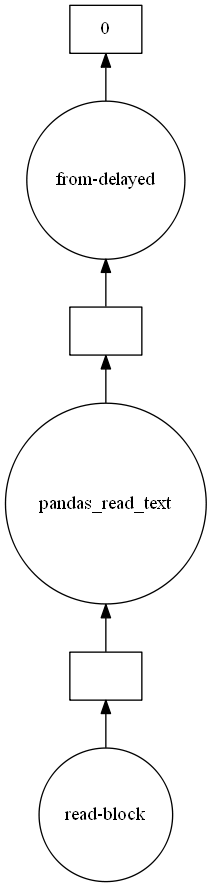

In [54]:
df2.visualize()

In [55]:
df2[" c2"].mean()

dd.Scalar<series-..., dtype=float64>

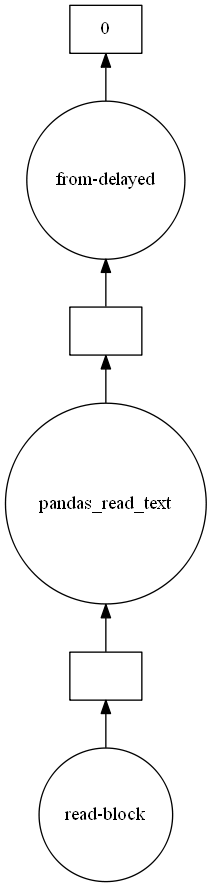

In [56]:
df2.visualize()

In [57]:
df2[" c2"].mean().compute()

2.22

In [58]:
df1[" c2"] = 100
df1

,c1,c2,c3
0,1,100,one
1,2,100,two
2,3,100,three


In [59]:
df2 = df2.assign(c2 = 100)
df2.head()

C:\Users\acorn\Anaconda3\lib\site-packages\dask\dataframe\core.py:5943: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,c1,c2,c3,c2
0,1,1.11,one,100
1,2,2.22,two,100
2,3,3.33,three,100


In [68]:
%%writefile data/datatest1.csv
time,temp,humidity
0,22,58
1,21,57
2,25,57
3,26,55
4,22,53
5,23,59

Overwriting data/datatest1.csv


In [69]:
%%writefile data/datatest2.csv
time,temp,humidity
0,22,58
1,21,57
2,25,57
3,26,55
4,22,53
5,23,59

Writing data/datatest2.csv


In [70]:
%%writefile data/datatest3.csv
time,temp,humidity
0,22,58
1,21,57
2,25,57
3,26,55
4,22,53
5,23,59

Overwriting data/datatest3.csv


In [71]:
df3 = dd.read_csv("data/data*.csv")
df3
df3.count().compute()

time        18
temp        18
humidity    18
dtype: int64

In [72]:
df3.temp.describe().compute()

count    18.000000
mean     23.166667
std       1.823055
min      21.000000
25%      22.000000
50%      22.500000
75%      24.500000
max      26.000000
Name: temp, dtype: float64

In [ ]:
# 대량 데이터의 병렬처리
df4 = dd.read_csv("data/crime.csv", dtype = str, error_bad_lines = False,
                 warn_bad_lines = False)

In [ ]:
df4

In [ ]:
df4.tail()
df4.count().compute()

In [ ]:
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

In [ ]:
%%time
df4.count().compute()

In [ ]:
"""
Dask에서 제공하는 스케줄러
    - dask.get : 단일 쓰레드
    - dask.threaded.get : 멀티 스레드 풀(pool)
    - dask.multiprocessing.get : 멀티 프로세스 풀
    - distributed.Client.get : 여러 대의 컴퓨터에서 분산 처리
    
"""

In [ ]:
%%time
df4.count().compute(scheduler = "processes", num_workers = 4)

### Batch
    - https://tykimos.github.io/2017/03/25/Fit_Talk/
    - https://github.com/hunkim/DeepLearningZeroToAll/blob/master/lab-04-4-tf_reader_linear_regression.py
    
    -주석
    - https://sshkim.tistory.com/139
    -Batch : 전체 데이터
    -Stochastic : 1개 데이터
    -Mini-Batch
    
### Epoch
    - 알고리즘의 수행횟수

In [73]:
filename_queue = tf.train.string_input_producer(
    ['data-01-test-score.csv'], shuffle=False, name='filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

# Default values, in case of empty columns. Also specifies the type of the
# decoded result.
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)
xy

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TextLineDataset`.


[<tf.Tensor 'DecodeCSV:0' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV:1' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV:2' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV:3' shape=() dtype=float32>]

In [75]:
train_x_batch, train_y_batch = \
    tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).


In [74]:
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    coord =tf.train.Coordinator()
    
    threads=tf.train.start_queue_runners(sess = sess, coord=coord)
    for step in range(2001):
        x_batch, y_batch=sess.run([train_x_batch, train_y_batch])
        sess.run(train, feed_dict={X:x_batch, y:y_batch})
        
    coord.request_stop()
    coord.join(threads)
    
    # Ask my score
    print("Your score will be ",
      sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))

    print("Other scores will be ",
      sess.run(hypothesis, feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))



Instructions for updating:
To construct input pipelines, use the `tf.data` module.


In [ ]:
# Ask my score
print("Your score will be ",
      sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))

print("Other scores will be ",
      sess.run(hypothesis, feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))

'''